In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

### Load the Iris Dataset 🌷

In [53]:
iris = load_iris()
X = iris.data
true_labels = iris.target

### ✨ Steps of the Custom KMeans Algorithm ✨ 

 1. **Initialize centroids** with random noise added to the average of the data.
 2. **Assign each point** to the closest centroid.
 3. **Recalculate centroids** based on the mean of points in each cluster.
 4. **Check for convergence**: If centroids don’t change much, stop.
 5. 🔄**Repeat** steps 2-4 until converged or max iterations.


In [54]:
class CustomKMeans:
    def __init__(self, k=3, max_iters=300, threshold=1e-4):
        self.k = k
        self.max_iters = max_iters
        self.threshold = threshold
        self.centroids = None
        self.clusters = None
    
    def fit_predict(self, X):
        avg = np.mean(X, axis=0)        
        self.centroids = self.split_average(avg)
        
        for i in range(self.max_iters):
            self.clusters = self.assign_cluster(X)

            old_centroids = self.centroids.copy()
            self.centroids = self.calculate_centroids(X)

            if np.all(np.abs(self.centroids - old_centroids) <= self.threshold):
                break
        
        return self.clusters
    
    def split_average(self, avg):
        centroids = []

        for i in range(self.k):
            noise = np.random.normal(scale=0.1, size=avg.shape)
            centroids.append(avg + noise)
        return np.array(centroids)
    
    def assign_cluster(self, X):
        distances = np.linalg.norm(X.reshape(-1, 1, X.shape[1]) - self.centroids, axis=2)
        return np.argmin(distances, axis=1)
    
    def calculate_centroids(self, X):
        centroids = np.zeros((self.k, X.shape[1]))
        for i in range(self.k):
            centroids[i] = np.mean(X[self.clusters == i], axis=0)
        return centroids


### Custom KMeans

In [55]:
custom_kmeans = CustomKMeans(k=3)
custom_clusters = custom_kmeans.fit_predict(X)

### Sklearn KMeans 

In [56]:
sklearn_kmeans = KMeans(n_clusters=3)
sklearn_clusters = sklearn_kmeans.fit_predict(X)

### Plotting the results 🌟

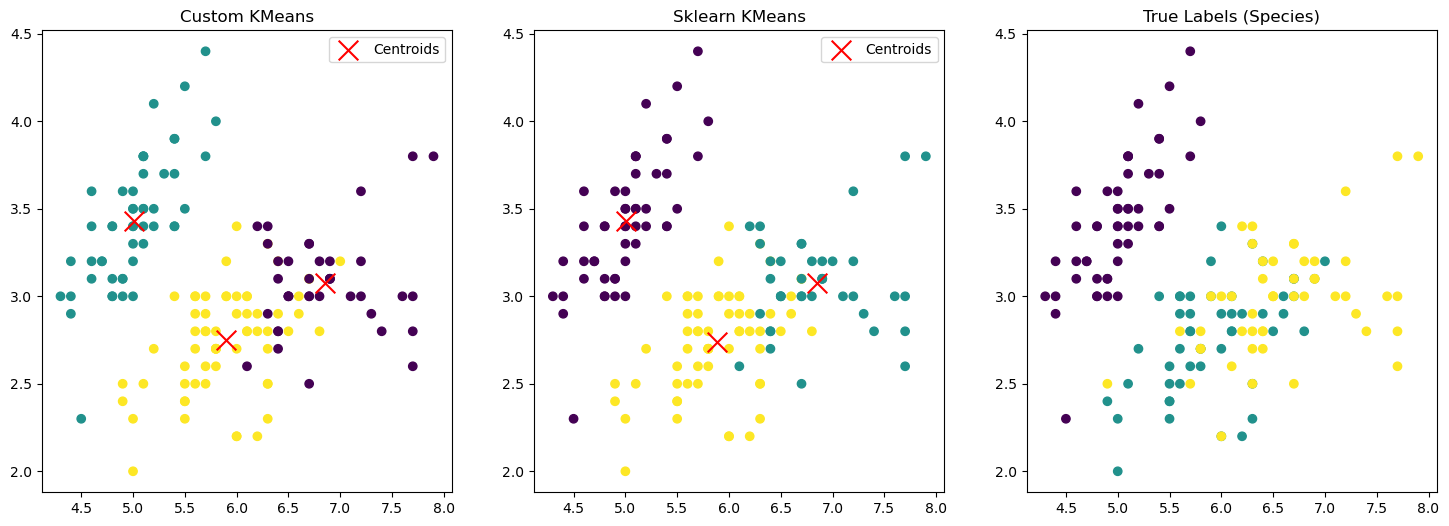

In [57]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 1], c=custom_clusters, cmap='viridis')
plt.scatter(custom_kmeans.centroids[:, 0], custom_kmeans.centroids[:, 1], s=200, c='red', marker='x', label='Centroids')
plt.title('Custom KMeans')
plt.legend()

plt.subplot(1, 3, 2)
plt.scatter(X[:, 0], X[:, 1], c=sklearn_clusters, cmap='viridis')
plt.scatter(sklearn_kmeans.cluster_centers_[:, 0], sklearn_kmeans.cluster_centers_[:, 1], s=200, c='red', marker='x', label='Centroids')
plt.title('Sklearn KMeans')
plt.legend()

plt.subplot(1, 3, 3)
plt.scatter(X[:, 0], X[:, 1], c=true_labels, cmap='viridis')
plt.title('True Labels (Species)')
plt.show()